In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns, pandas as pd
data = sns.load_dataset("iris")

In [2]:
import seaborn as sns
sns.set_theme(context="notebook", style="ticks", palette="deep")
plt.rcParams.update({"font.size": 11})

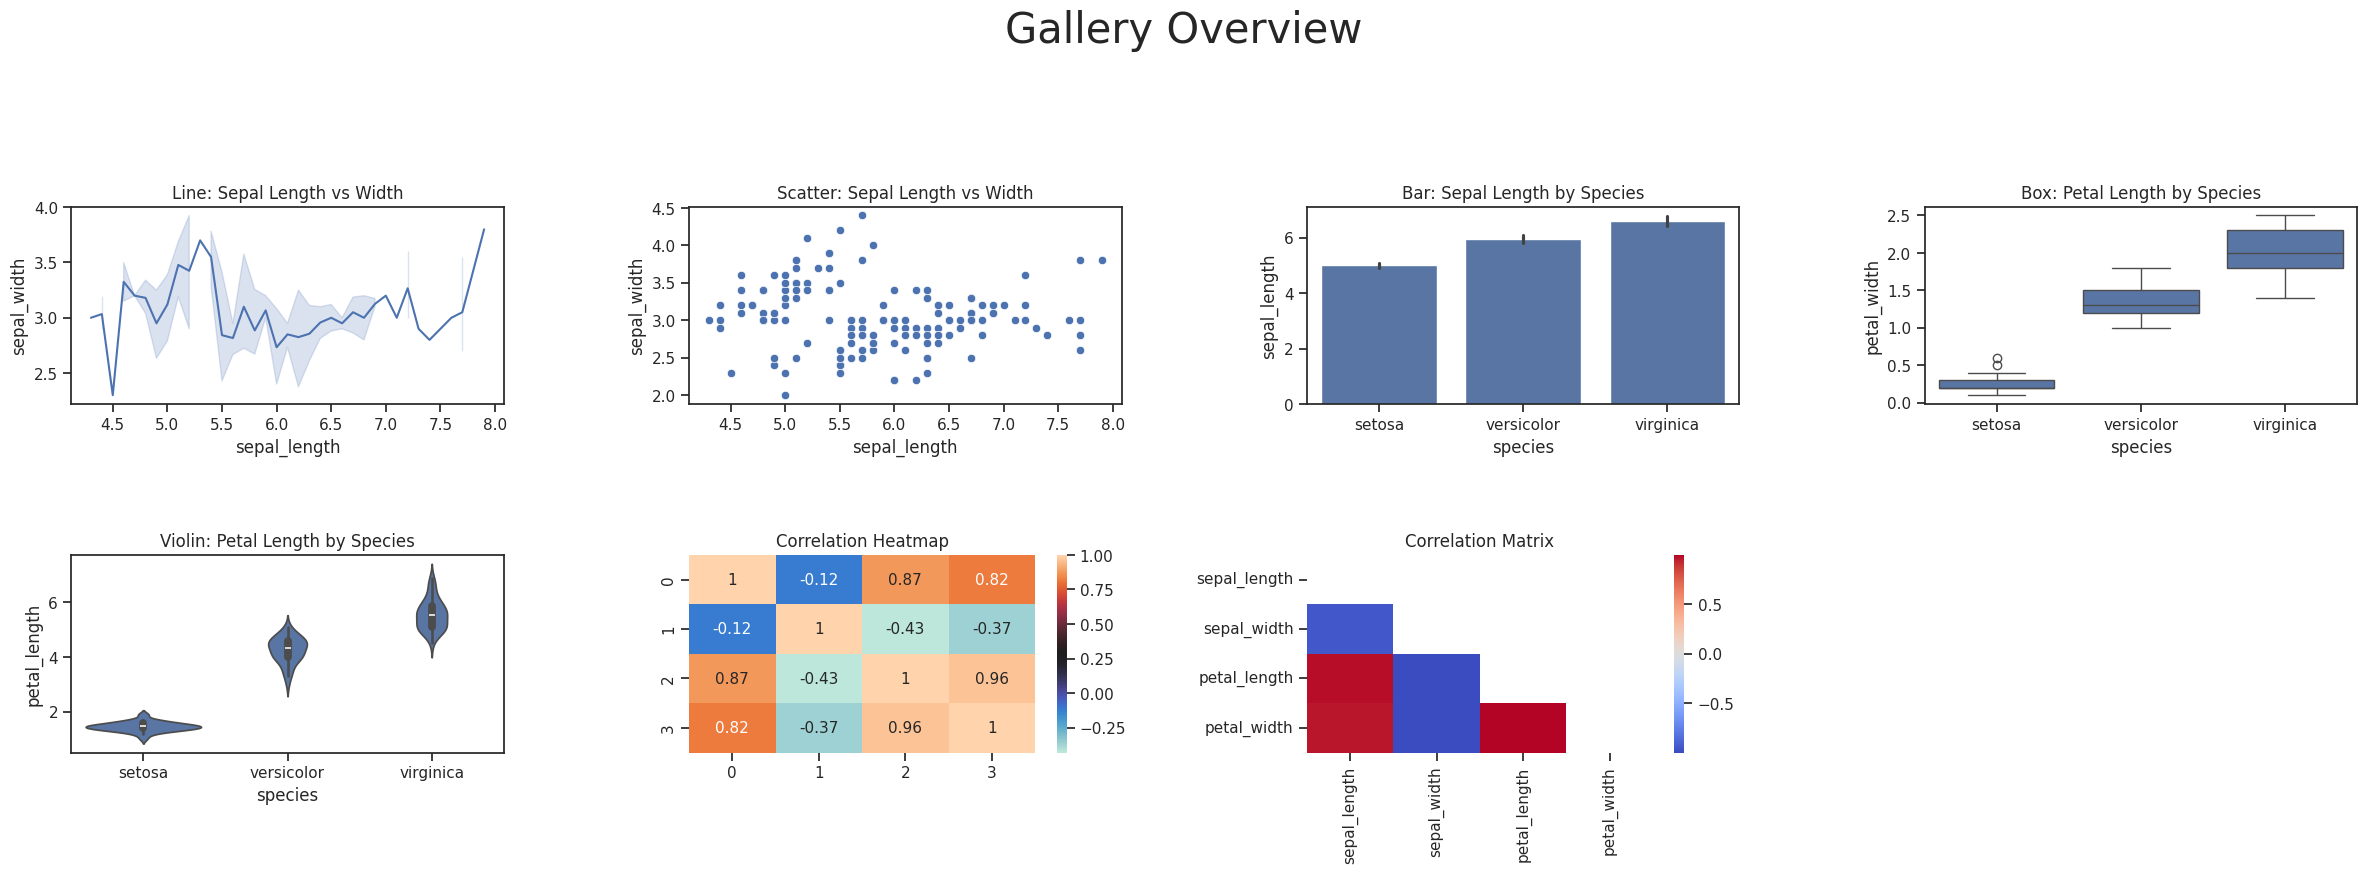

In [3]:
from part2 import (
    sns_line, sns_scatter, sns_bar, sns_box,
    sns_violin, sns_pair, sns_corr, sns_heat
)

corr = data.select_dtypes(float).corr()

gallery = [
    (sns_line, dict(data=data, x="sepal_length", y="sepal_width"),  "Line: Sepal Length vs Width"),
    (sns_scatter, dict(data=data, x="sepal_length", y="sepal_width"),  "Scatter: Sepal Length vs Width"),
    (sns_bar, dict(data=data, x="species", y="sepal_length"), "Bar: Sepal Length by Species"),
    (sns_box, dict(data=data, x="species", y="petal_width"), "Box: Petal Length by Species"),
    (sns_violin, dict(data=data, x="species", y="petal_length"), "Violin: Petal Length by Species"),
    (sns_heat, dict(data=corr, annot=True), "Correlation Heatmap"),
    (sns_corr, dict(data=corr, annot=False), "Correlation Matrix"),
]

fig, axes = plt.subplots(2, 4, figsize=(25, 10))
fig.tight_layout(pad=5.0)
fig.subplots_adjust(wspace=0.35, hspace=0.45)
axes = axes.ravel()

for ax, (func, kwargs, title) in zip(axes, gallery):
    func(ax=ax, **kwargs)
    ax.set_title(title)

# if len(gallery) > len(axes):
#     axes[len(gallery)].axis("off")

for ax in axes[len(gallery):]:
    ax.axis("off")

fig.suptitle("Gallery Overview", fontsize=30, y=0.93)
fig.tight_layout(pad=5.0, rect=[0, 0, 1, 0.95])
plt.show()


#### A Violin Plot displays the following information:

**A box plot that shows the median, quartiles, and potential outliers.**<br>
**A rotated kernel density plot on each side, which provides a smoothed representation of the data distribution.**<br>
**The width of the violin plot at any given point indicates the density or frequency of data points.**

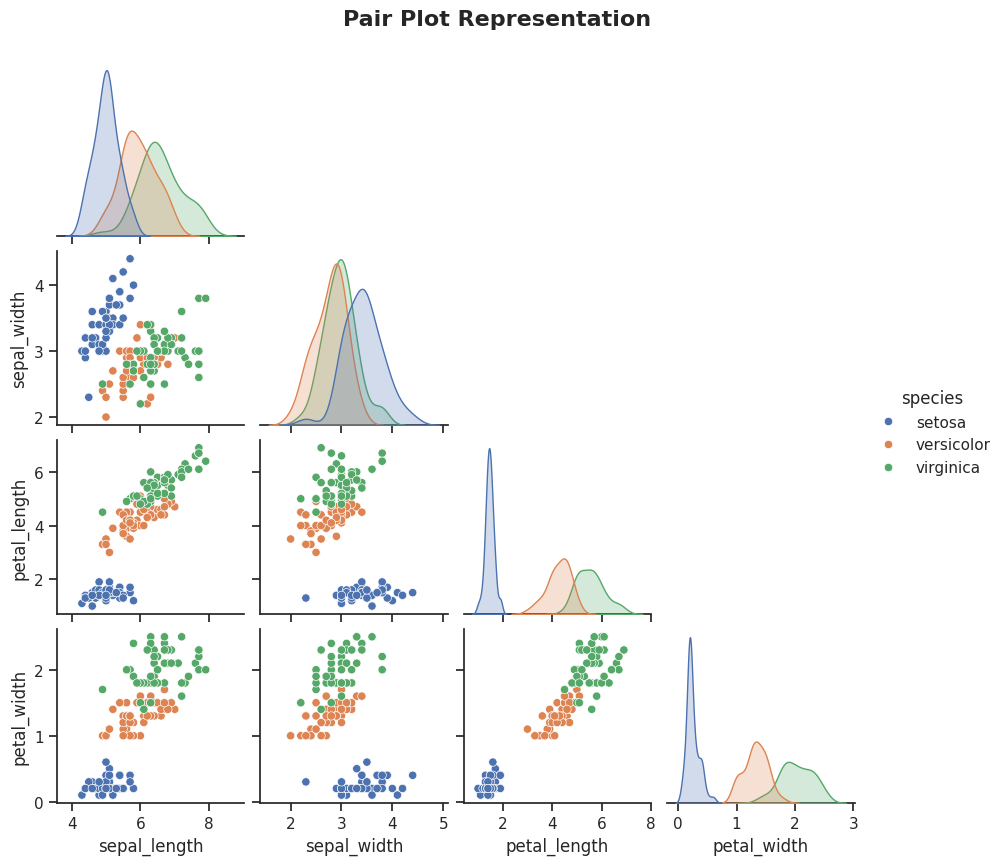

In [4]:
import matplotlib.pyplot as plt
df = data
from part2 import sns_pair

g = sns_pair(
    data=df,
    hue="species",
    corner=True,
    diag_kind="kde",
    height=2.2
)

g.fig.suptitle("Pair Plot Representation", fontsize=16, weight="bold")
g.fig.subplots_adjust(top=0.92)


#### Pair Plot Respresentation:

**Scatterplots:**<br>
**On the diagonal of the grid, you typically see histograms or**<br>
**kernel density plots for each variable in your dataset.**<br>
**These histograms show the distribution of each variable individually.**<br>
**Off-diagonal Scatterplots:**<br>
**In the lower and upper triangles of the grid, you see scatterplots.**<br>
**Each scatterplot shows the relationship between two different variables.**<br>
**These scatterplots help you visualize how variables relate to each other.**